# Projeto AceleraDev Data Science

Esse notebook é parte da solução do projeto prático AceleraDev Data Science da  [Codenation](https://www.codenation.dev/).

**Business Problem:** O objetivo do desafio é fornecer um serviço automatizado que recomenda leads (novos clientes) para um usuário, dado sua atual lista de clientes (Portfólio).

**Bases de dados:** Foram fornecidas as seguintes bases:


*   [Mercado](https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_market.csv.zip): Base com informações sobre as empresas do Mercado a ser considerado. O dataset é formado por 462298 empresas e 181 features;
*   [Portfolio 1](https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio1.csv): Ids dos clientes da empresa 1;
*   [Portfolio 2](https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio2.csv): Ids dos clientes da empresa 2;
*   [Portfolio 3](https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio3.csv): Ids dos clientes da empresa 3.


Esse projeto será implementado no Google Colab, com auxilio das bibliotecas abaixo. Pelo tamanho da base de empresas, fiz upload no Drive e mantive o arquivo zipado para reduzir o espaço utilizado. 

Ótimo, então vamos começar a diversão.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

import folium
import random

import os
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from google.colab import drive

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.chdir(r'/content/drive/My Drive/Codenation')

In [ ]:
base = pd.read_csv("estaticos_market.zip", compression='zip', index_col=0)

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Columns: 181 entries, id to qt_filiais
dtypes: bool(9), float64(144), int64(1), object(27)
memory usage: 614.1+ MB


In [ ]:
base.shape

(462298, 181)

In [ ]:
base.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,Fals

In [ ]:
portfolio_1 = pd.read_csv("https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio1.csv", index_col=0)
portfolio_2 = pd.read_csv("https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio2.csv", index_col=0)
portfolio_3 = pd.read_csv("https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio3.csv", index_col=0)

In [ ]:
print(portfolio_1.shape, portfolio_2.shape, portfolio_3.shape)

(555, 181) (566, 1) (265, 1)


Ótimo, já estamos com todos os datasets lidos. A primeira análise é se os portfólios já estão na base de dados. Para isso vou fazer um encoding da coluna 'id', para ficar um valor menor e mais fácil de manipular. Após isso, vou definir essa coluna como índice dos dataframes. 

In [ ]:
label_enc = LabelEncoder()

In [ ]:
base['id'] = label_enc.fit_transform(base['id'])

In [ ]:
portfolio_1['id'] = label_enc.transform(portfolio_1['id'])
portfolio_2['id'] = label_enc.transform(portfolio_2['id'])
portfolio_3['id'] = label_enc.transform(portfolio_3['id'])

Até aqui não tivemos nenhum erro, então os portfólios já estão na base de dados. 

In [ ]:
base.set_index(['id'], inplace=True)

In [ ]:
portfolio_1.set_index(['id'], inplace=True)
portfolio_2.set_index(['id'], inplace=True)
portfolio_3.set_index(['id'], inplace=True)

O próximo passo seria preencher os portfólios com os dados da base. Mas, primeiro vou tratar os valores 'NaN' da base e depois migrar a base completa para os portfólios.

Montei um relatório da base de clientes com o Pandas Profiling. É uma ótima forma de analisar as features da base e montar uma estratégia de processamento dos dados. As linhas estão comentadas pois o processo é demorado, mas o html gerado está disponível também no Github para visualização. 

In [ ]:
#!pip install -U pandas-profiling
#from pandas_profiling import ProfileReport
#profile = ProfileReport(base, minimal=True,  html={'style':{'full_width':True}})
#profile.to_file(output_file="base_report.html")

## Análise exploratória de dados ( EDA - Exploratory Data Analysis)

A primeira parte que vou fazer é verificar e preencher valores faltantes (NaN) nas features da base de empresa. 

A seguinte função verifica quais colunas possuem valores nulos e retorna um Dataframe com o total, percentual e tipo da coluna.

In [ ]:
def getMissing(data):
  total = data.isnull().sum().sort_values(ascending=False)
  percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)

  missing_data = pd.concat([total, percent, data.dtypes], 
                           axis=1, 
                           keys=['Total', 'Percent', "Type"])
  missing_data.sort_values(by='Total', ascending=False, inplace=True)
  
  #Retorna apenas colunas que possuem algum valor faltante
  return missing_data[missing_data['Total'] > 0]

In [ ]:
getMissing(base)

,Total,Percent,Type
qt_alteracao_socio_180d,462298,100.000000,float64
qt_alteracao_socio_365d,462298,100.000000,float64
qt_alteracao_socio_total,462298,100.000000,float64
grau_instrucao_macro_desconhecido,462298,100.000000,float64
qt_alteracao_socio_90d,462298,100.000000,float64
coligada_mais_antiga_baixada,462162,99.970582,float64
idade_media_coligadas_baixadas,462162,99.970582,float64
coligada_mais_nova_baixada,462162,99.970582,float64
vl_total_veiculos_antt,462122,99.961929,float64
vl_total_tancagem,462018,99.939433,float64


Como podemos verificar no dataframe gerado, muitas colunas possuem muitos dados faltantes. Vou fazer fazer o tratamento para algumas features relativas ao faturamento, faixa de renda, tributação e localização do negócio (mais importantes na minha análise). As demais features que possuem mais 20% de valores faltantes serão excluídas. 

Para os valores faltantes das features de faturamento serão inseridos valores 0 e 'SEM INFORMACAO'.

As colunas 'de_faixa_faturamento_estimado_grupo' e 'vl_faturamento_estimado_grupo_aux' serão removidas, pois possuem mais de 90% de valores iguais com as colunas 'de_faixa_faturamento_estimado' e 'vl_faturamento_estimado_aux'.

In [ ]:
base['de_faixa_faturamento_estimado'].fillna(value='SEM INFORMACAO', inplace=True)
base['vl_faturamento_estimado_aux'].fillna(value=0 , inplace=True)

base.drop(columns=['de_faixa_faturamento_estimado_grupo', 'vl_faturamento_estimado_grupo_aux'], inplace= True)

Inserindo valores 'False' nas colunas de opção tributária, pois se não é optante do Simples ou SIMEI, será tributado por Lucro Real ou Lucro Presumido.

In [ ]:
base['fl_simples_irregular'].fillna(value=False, inplace=True)
base['fl_optante_simples'].fillna(value=False, inplace=True)
base['fl_optante_simei'].fillna(value=False, inplace=True)

As features de 'nm_meso_regiao' e 'nm_micro_regiao' são muito importantes, pois contêm a localização do negócio. Para preencher os valores 'NaN' da 'meso_regiao' utilizarei a moda com base na UF, gerando um dicionário e inserindo com a função 'fillna'. A partir disso, farei o mesmo processo para a 'micro_região', utilizando a moda baseada na 'meso_regiao'. 

A UF Rondônia (RO) não possui nenhuma meso e micro região cadastrada (todas nulas). Então farei a inferência da 'meso_regiao' como 'Madeira-Guapore' e a 'micro_regiao' como 'Porto Velho' que é a capital do estado.

In [ ]:
base.groupby('sg_uf')['nm_meso_regiao'].apply(pd.Series.mode).unstack(level=-1)[0].to_dict()

{'AC': 'VALE DO ACRE',
 'AM': 'CENTRO AMAZONENSE',
 'MA': 'NORTE MARANHENSE',
 'PI': 'CENTRO NORTE PIAUIENSE',
 'RN': 'LESTE POTIGUAR'}

In [ ]:
dict_uf_meso = base.groupby('sg_uf')['nm_meso_regiao'].apply(pd.Series.mode).unstack(level=-1)[0].to_dict()
dict_uf_meso['RO'] = 'MADEIRA-GUAPORE'

In [ ]:
base['nm_meso_regiao'].fillna( value=base['sg_uf'].map(dict_uf_meso) , inplace=True)

In [ ]:
dict_meso_micro = base.groupby('nm_meso_regiao')['nm_micro_regiao'].apply(pd.Series.mode).unstack(level=-1)[0].to_dict()
dict_meso_micro['MADEIRA-GUAPORE'] = 'PORTO VELHO'

In [ ]:
base['nm_micro_regiao'].fillna(value=base.nm_meso_regiao.map(dict_meso_micro) , inplace=True)

As features com mais de 20% de dados faltantes serão removidas.

In [ ]:
missing_data_base = getMissing(base)
base.drop(missing_data_base[missing_data_base['Percent'] > 20].index, axis=1, inplace=True)

In [ ]:
#Verificando quais colunas ainda possuem valores faltantes
getMissing(base)

,Total,Percent,Type
nu_meses_rescencia,45276,9.793683,float64
de_saude_tributaria,14851,3.212430,object
de_saude_rescencia,14851,3.212430,object
de_nivel_atividade,11168,2.415758,object
sg_uf_matriz,1939,0.419426,object
fl_antt,1927,0.416831,object
vl_total_veiculos_leves_grupo,1927,0.416831,float64
vl_total_veiculos_pesados_grupo,1927,0.416831,float64
fl_veiculo,1927,0.416831,object
fl_passivel_iss,1927,0.416831,object


As colunas 'nu_meses_rescencia' e 'sg_uf_matriz' serão excluídas, porque possuem informações similares às colunas 'de_saude_rescencia' e 'sg_uf', respectivamente.

In [ ]:
base.drop(columns=['nu_meses_rescencia', 'sg_uf_matriz'], inplace= True)

A coluna 'dt_situacao' será removida e mantida a coluna 'idade_emp_cat'.

In [ ]:
base.drop(columns=['dt_situacao'], inplace= True)

As colunas 'de_nivel_atividade', 'de_saude_tributaria' e 'de_saude_rescencia', podem ser preenchidas com a combinação de outras colunas, conforme as seguintes células.

In [ ]:
dict_setor_ativ = base.groupby('setor')['de_nivel_atividade'].apply(pd.Series.mode).unstack(level=-1)[0].to_dict()
base['de_nivel_atividade'].fillna( value=base['setor'].map(dict_setor_ativ) , inplace=True)

In [ ]:
dict_nivel_saude = base.groupby('de_nivel_atividade')['de_saude_tributaria'].apply(pd.Series.mode).unstack(level=-1)[0].to_dict()
base['de_saude_tributaria'].fillna( value=base['de_nivel_atividade'].map(dict_nivel_saude) , inplace=True)

In [ ]:
dict_saude_tr_resc = base.groupby('de_saude_tributaria')['de_saude_rescencia'].apply(pd.Series.mode).unstack(level=-1)[0].to_dict()
base['de_saude_rescencia'].fillna( value=base['de_saude_tributaria'].map(dict_saude_tr_resc) , inplace=True)

1927 registros serão excluídos da base, pois não possuem informação do setor, segmento e divisão. Assim, não temos como prever qual o tipo de atividade que essas empresas exercem, já que o ramo da atividade está como 'OUTROS'.

In [ ]:
base[base['setor'].isnull()][['de_ramo', 'setor', 'nm_divisao', 'nm_segmento']].apply(pd.Series.value_counts)

,de_ramo,setor,nm_divisao,nm_segmento
OUTROS,1927,NaN,NaN,NaN


In [ ]:
base.dropna(axis=0, inplace=True)

In [ ]:
#Verificando se ainda existem valores nulos
getMissing(base)

,Total,Percent,Type


In [ ]:
base.shape

(460371, 36)

### Feature Engineering

Ótimo, a partir de agora nossa base de dados está completa, sem nenhum dado faltante.

In [ ]:
print("Base com ", len(base.columns), " features \n",base.columns )

Base com  36  features 
 Index(['fl_matriz', 'de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro',
       'de_ramo', 'setor', 'idade_empresa_anos', 'idade_emp_cat', 'fl_me',
       'fl_sa', 'fl_epp', 'fl_mei', 'fl_ltda', 'fl_st_especial', 'fl_email',
       'fl_telefone', 'fl_rm', 'nm_divisao', 'nm_segmento', 'fl_spa',
       'fl_antt', 'fl_veiculo', 'fl_optante_simples',
       'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo',
       'fl_optante_simei', 'de_saude_tributaria', 'de_saude_rescencia',
       'de_nivel_atividade', 'fl_simples_irregular', 'nm_meso_regiao',
       'nm_micro_regiao', 'fl_passivel_iss', 'de_faixa_faturamento_estimado',
       'vl_faturamento_estimado_aux', 'qt_filiais'],
      dtype='object')


In [ ]:
base.head()

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,vl_faturamento_estimado_aux,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300724,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,True,0.0,0.0,False,VERDE,ACIMA DE 1 ANO,ALTA,False,LESTE POTIGUAR,NATAL,True,"DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,0
175885,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,False,0.0,0.0,False,CINZA,ATE 1 ANO,BAIXA,False,CENTRO NORTE PIAUIENSE,TERESINA,True,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,0
134337,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,False,True,False,False,False,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,True,0.0,0.0,True,AMARELO,ACIMA DE 1 ANO,MEDIA,False,CENTRO AMAZONENSE,MANAUS,True,"ATE R$ 81.000,00",50000.0,0
92437,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,False,False,True,True,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,True,0.0,0.0,False,AMARELO,ACIMA DE 1 ANO,MEDIA,False,CENTRO AMAZONENSE,MANAUS,True,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,0
56911,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False,False,False,False,False,True,True,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,False,False,True,0.0,0.0,False,VERDE,ACIMA DE 1 ANO,ALTA,False,LESTE POTIGUAR,NATAL,True,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,0


Vou começar convertendo as features booleanas para inteiro.

In [ ]:
feature_bool = ['fl_matriz', 'fl_me',	'fl_sa',	'fl_epp',	'fl_mei',	'fl_ltda',
                'fl_st_especial',	'fl_email',	'fl_telefone', 
                'fl_spa',	'fl_antt',	'fl_veiculo',	'fl_optante_simples',
                'fl_optante_simei', 'fl_simples_irregular', 'fl_passivel_iss',
                ]

#Convert colunas bool para inteiro binário
base[feature_bool] = base[feature_bool].astype(int)

A minha ideia é converter as colunas categóricas para dummies. Por isso, algumas colunas serão removidas por terem dados que apresentam a mesma informação de outra coluna.


In [ ]:
base[['de_ramo',	'setor', 'nm_divisao',	'nm_segmento', 'de_natureza_juridica' ,	'natureza_juridica_macro']].nunique()

de_ramo                    32
setor                       5
nm_divisao                 87
nm_segmento                21
de_natureza_juridica       66
natureza_juridica_macro     7
dtype: int64


Para categorizar o ramo de atividade temos as colunas 'de_natureza_juridica',	'natureza_juridica_macro', 'de_ramo', 'setor', 'nm_divisao' e 'nm_segmento'.  Serão mantidas as features 'setor' e 'nm_divisao', que já podem categorizar adequadamente o negócio. 

In [ ]:
base.drop(columns=['de_ramo',	'nm_segmento', 'de_natureza_juridica' ,	'natureza_juridica_macro'], inplace= True)

Vou remover a feature 'idade_empresa_anos', pois a coluna 'idade_emp_cat' já atende a necessidade de categorização por tempo de constituição. 

In [ ]:
base.drop(columns=['idade_empresa_anos'], inplace= True)

In [ ]:
#Convertendo a coluna de área metropolitana para binário
base['fl_rm'] = base['fl_rm'].map({'NAO': 0, 'SIM': 1})

In [ ]:
base.head()

,fl_matriz,sg_uf,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,vl_faturamento_estimado_aux,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300724,1,RN,CONSTRUÇÃO CIVIL,10 a 15,0,0,0,0,0,0,1,1,1,CONSTRUCAO DE EDIFICIOS,0,0,0,1,0.0,0.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,LESTE POTIGUAR,NATAL,1,"DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,0
175885,1,PI,SERVIÇO,1 a 5,0,0,0,1,0,0,1,1,1,ALIMENTACAO,0,0,0,0,0.0,0.0,0,CINZA,ATE 1 ANO,BAIXA,0,CENTRO NORTE PIAUIENSE,TERESINA,1,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,0
134337,1,AM,SERVIÇO,5 a 10,0,0,0,1,0,0,0,1,1,TRANSPORTE TERRESTRE,0,0,0,1,0.0,0.0,1,AMARELO,ACIMA DE 1 ANO,MEDIA,0,CENTRO AMAZONENSE,MANAUS,1,"ATE R$ 81.000,00",50000.0,0
92437,1,AM,SERVIÇO,5 a 10,0,0,0,0,0,0,1,1,1,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,0,0,0,1,0.0,0.0,0,AMARELO,ACIMA DE 1 ANO,MEDIA,0,CENTRO AMAZONENSE,MANAUS,1,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,0
56911,1,RN,SERVIÇO,1 a 5,0,0,0,0,0,0,1,1,1,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,0,0,0,1,0.0,0.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,LESTE POTIGUAR,NATAL,1,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,0


In [ ]:
base.shape

(460371, 31)

Neste ponto preencho os portfólios com os dados da base já tratada e sem valores faltantes. 

In [ ]:
portfolio_1 = base.loc[portfolio_1.index.to_list()]
portfolio_2 = base.loc[portfolio_2.index.to_list()]
portfolio_3 = base.loc[portfolio_3.index.to_list()]

In [ ]:
print(portfolio_1.shape, portfolio_2.shape, portfolio_3.shape)

(555, 31) (566, 31) (265, 31)


Convertendo variáveis categóricas para Dummies.

In [ ]:
features_cat = ['sg_uf',	'setor', 'idade_emp_cat', 'nm_divisao', 'de_saude_tributaria',
                'de_saude_rescencia', 'de_nivel_atividade', 'nm_meso_regiao',
                'nm_micro_regiao', 'de_faixa_faturamento_estimado']

In [ ]:
base_dummies = pd.get_dummies(base, columns=features_cat)

In [ ]:
base_dummies.shape

(460371, 246)

In [ ]:
base_dummies.head()

,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,fl_simples_irregular,fl_passivel_iss,vl_faturamento_estimado_aux,qt_filiais,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,setor_AGROPECUARIA,setor_COMERCIO,setor_CONSTRUÇÃO CIVIL,setor_INDUSTRIA,setor_SERVIÇO,idade_emp_cat_1 a 5,idade_emp_cat_10 a 15,idade_emp_cat_15 a 20,idade_emp_cat_5 a 10,idade_emp_cat_<= 1,idade_emp_cat_> 20,nm_divisao_ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,nm_divisao_AGENCIAS DE VIAGENS OPERADORES TURISTICOS E SERVICOS DE RESERVAS,nm_divisao_AGRICULTURA PECUARIA E SERVICOS RELACIONADOS,nm_divisao_ALIMENTACAO,nm_divisao_ALOJAMENTO,nm_divisao_ALUGUEIS NAO IMOBILIARIOS E GESTAO DE ATIVOS INTANGIVEIS NAO FINANCEIROS,nm_divisao_ARMAZENAMENTO E ATIVIDADES AUXILIARES DOS TRANSPORTES,nm_divisao_ATIVIDADES ARTISTICAS CRIATIVAS E DE ESPETACULOS,nm_divisao_ATIVIDADES AUXILIARES DOS SERVICOS FINANCEIROS SEGUROS PREVIDENCIA COMPLEMENTAR E PLANOS DE SAUDE,nm_divisao_ATIVIDADES CINEMATOGRAFICAS PRODUCAO DE VIDEOS E DE PROGRAMAS DE TELEVISAO GRAVACAO DE SOM E EDICAO DE MUSICA,nm_divisao_ATIVIDADES DE APOIO A EXTRACAO DE MINERAIS,nm_divisao_ATIVIDADES DE ATENCAO A SAUDE HUMANA,nm_divisao_ATIVIDADES DE ATENCAO A SAUDE HUMANA INTEGRADAS COM ASSISTENCIA SOCIAL PRESTADAS EM RESIDENCIAS COLETIVAS E PARTICULARES,nm_divisao_ATIVIDADES DE EXPLORACAO DE JOGOS DE AZAR E APOSTAS,nm_divisao_ATIVIDADES DE ORGANIZACOES ASSOCIATIVAS,nm_divisao_ATIVIDADES DE PRESTACAO DE SERVICOS DE INFORMACAO,nm_divisao_ATIVIDADES DE RADIO E DE TELEVISAO,nm_divisao_ATIVIDADES DE SEDES DE EMPRESAS E DE CONSULTORIA EM GESTAO EMPRESARIAL,nm_divisao_ATIVIDADES DE SERVICOS FINANCEIROS,nm_divisao_ATIVIDADES DE VIGILANCIA SEGURANCA E INVESTIGACAO,nm_divisao_ATIVIDADES DOS SERVICOS DE TECNOLOGIA DA INFORMACAO,nm_divisao_ATIVIDADES ESPORTIVAS E DE RECREACAO E LAZER,nm_divisao_ATIVIDADES IMOBILIARIAS,nm_divisao_ATIVIDADES JURIDICAS DE CONTABILIDADE E DE AUDITORIA,nm_divisao_ATIVIDADES LIGADAS AO PATRIMONIO CULTURAL E AMBIENTAL,nm_divisao_ATIVIDADES VETERINARIAS,nm_divisao_CAPTACAO TRATAMENTO E DISTRIBUICAO DE AGUA,nm_divisao_COLETA TRATAMENTO E DISPOSICAO DE RESIDUOS RECUPERACAO DE MATERIAIS,nm_divisao_COMERCIO E REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS,nm_divisao_COMERCIO POR ATACADO EXCETO VEICULOS AUTOMOTORES E MOTOCICLETAS,nm_divisao_COMERCIO VAREJISTA,nm_divisao_CONFECCAO DE ARTIGOS DO VESTUARIO E ACESSORIOS,nm_divisao_CONSTRUCAO DE EDIFICIOS,nm_divisao_CORREIO E OUTRAS ATIVIDADES DE ENTREGA,nm_divisao_DESCONTAMINACAO E OUTROS SERVICOS DE GESTAO DE RESIDUOS,nm_divisao_EDICAO E EDICAO INTEGRADA A IMPRESSAO,nm_divisao_EDUCACAO,nm_divisao_ELETRICIDADE GAS E OUTRAS UTILIDADES,nm_divisao_ESGOTO E ATIVIDADES RELACIONADAS,nm_divisao_EXTRACAO DE CARVAO MINERAL,nm_divisao_EXTRACAO DE MINERAIS METALICOS,nm_divisao_EXTRACAO DE MINERAIS NAO METALICOS,nm_divisao_EXTRACAO DE PETROLEO E GAS NATURAL,nm_divisao_FABRICACAO DE BEBIDAS,nm_divisao_FABRICACAO DE CELULOSE PAPEL E PRODUTOS DE PAPEL,nm_divisao_FABRICACAO DE COQUE DE PRODUTOS DERIVADOS DO PETROLEO E DE BIOCOMBUSTIVEIS,nm_divisao_FABRICACAO DE EQUIPAMENTOS DE INFORMATICA PRODUTOS ELETRONICOS E OPTICOS,nm_divisao_FABRICACAO DE MAQUINAS APARELHOS E MATERIAIS ELETRICOS,nm_divisao_FABRICACAO DE MAQUINAS E EQUIPAMENTOS,nm_divisao_FABRICACAO DE MOVEIS,nm_divisao_FABRICACAO DE OUTROS EQUIPAMENTOS DE TRANSPORTE EXCETO VEICULOS AUTOMOTORES,nm_divisao_FABRICACAO DE PRODUTOS ALIMENTICIOS,nm_divisao_FABRICACAO DE PRODUTOS DE BORRACHA E DE MATERIAL PLASTICO,nm_divisao_FABRICACAO DE PRODUTOS DE MADEIRA,nm_divisao_FABRICACAO DE PRODUTOS DE METAL EXCETO MAQUINAS E EQUIPAMENTOS,nm_divisao_FABRICACAO DE PRODUTOS DE MINERAIS NAO METALICOS,nm_divisao_FABRICACAO DE PRODUTOS DIVERSOS,nm_divisao_FABRICACAO DE PRODUTOS DO FUMO,nm_divisao_FABRICACAO DE PRODUTOS FARMOQUIMICOS E FARMACEUTICOS,nm_divisao_FABRICA

In [ ]:
portfolio_1_train = base_dummies.loc[portfolio_1.index.to_list()]
portfolio_2_train = base_dummies.loc[portfolio_2.index.to_list()]
portfolio_3_train = base_dummies.loc[portfolio_3.index.to_list()]

In [ ]:
print(base_dummies.shape, portfolio_1_train.shape, portfolio_2_train.shape, portfolio_3_train.shape)

(460371, 246) (555, 246) (566, 246) (265, 246)


### Modelagem

A ideia básica do modelo é que faça a clusterização mais atrativa pelo setor de atividade da empresa. O gráfico a seguir mostra que a base possui predominância de empresas de comércio e serviços. Sendo concentradas nos estados de Amazonas, Maranhão, Piauí e Rio Grande do Norte. 

A base é formada predominantemente por micros e pequenas empresas, que faturam até R$ 4.8 milhões por ano. 

Text(0.5, 0, 'Estados')

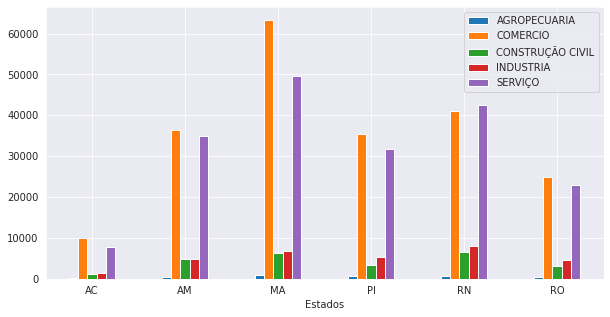

In [ ]:
base.groupby('sg_uf')['setor'].apply(pd.Series.value_counts).unstack().plot.bar(figsize = (10,5) )
plt.xticks(rotation='horizontal')
plt.xlabel('Estados')

Text(0.5, 0, 'Setores')

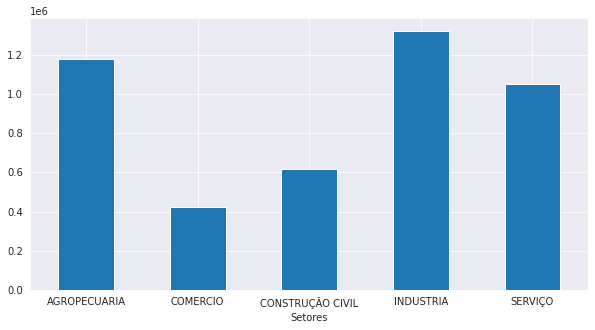

In [ ]:
base.groupby('setor')['vl_faturamento_estimado_aux'].apply(pd.Series.mean).plot.bar(figsize = (10,5) )
plt.xticks(rotation='horizontal')
plt.xlabel('Setores')

In [ ]:
base['de_faixa_faturamento_estimado'].value_counts()

DE R$ 81.000,01 A R$ 360.000,00             271959
ATE R$ 81.000,00                             98558
DE R$ 360.000,01 A R$ 1.500.000,00           46203
SEM INFORMACAO                               28684
DE R$ 1.500.000,01 A R$ 4.800.000,00         10152
DE R$ 4.800.000,01 A R$ 10.000.000,00         2150
DE R$ 10.000.000,01 A R$ 30.000.000,00        1445
DE R$ 30.000.000,01 A R$ 100.000.000,00        871
DE R$ 100.000.000,01 A R$ 300.000.000,00       253
DE R$ 300.000.000,01 A R$ 500.000.000,00        48
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS        27
ACIMA DE 1 BILHAO DE REAIS                      21
Name: de_faixa_faturamento_estimado, dtype: int64

In [ ]:
dict_porte = {'DE R$ 1.500.000,01 A R$ 4.800.000,00' : 'Pequena',
       'DE R$ 81.000,01 A R$ 360.000,00': 'Micro',
       'ATE R$ 81.000,00': 'Micro',
       'SEM INFORMACAO': 'Micro',
       'DE R$ 360.000,01 A R$ 1.500.000,00': 'Pequena',
       'DE R$ 10.000.000,01 A R$ 30.000.000,00': 'Média',
       'DE R$ 4.800.000,01 A R$ 10.000.000,00': 'Média',
       'DE R$ 30.000.000,01 A R$ 100.000.000,00': 'Grande',
       'DE R$ 300.000.000,01 A R$ 500.000.000,00': 'Grande',
       'DE R$ 100.000.000,01 A R$ 300.000.000,00': 'Grande',
       'ACIMA DE 1 BILHAO DE REAIS': 'Grande',
       'DE R$ 500.000.000,01 A 1 BILHAO DE REAIS': 'Grande'}

In [ ]:
base['porte'] = base['de_faixa_faturamento_estimado'].map(dict_porte)

Text(0.5, 0, 'Setores')

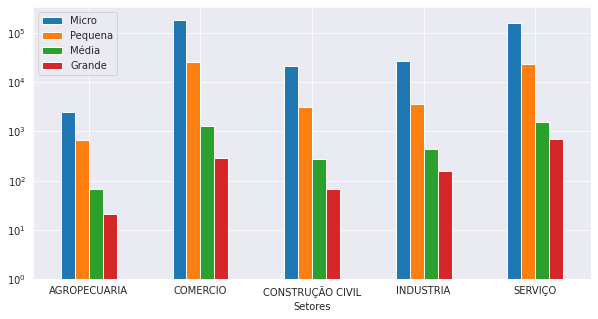

In [ ]:
base.groupby('setor')['porte'].apply(pd.Series.value_counts).unstack().plot.bar(figsize = (10,5) , log=True)
plt.xticks(rotation='horizontal')
plt.xlabel('Setores')

O portfólio 1 possui predominância do setor de comércio e de micro e pequenas empresa com faturamento até R$ 4.8 milhões.

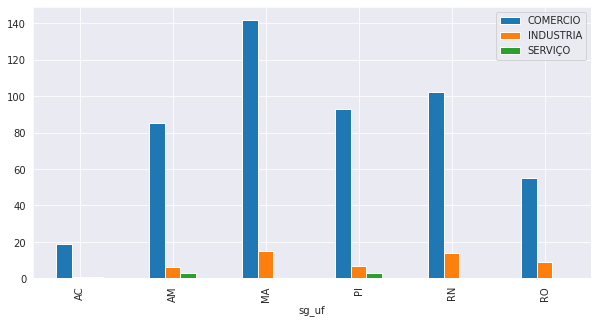

In [ ]:
portfolio_1.groupby('sg_uf')['setor'].apply(pd.Series.value_counts).unstack().plot.bar(figsize = (10,5))

Text(0, 0.5, 'Média Faturamento R$')

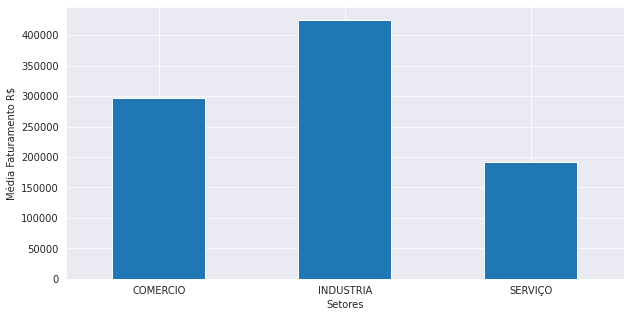

In [ ]:
portfolio_1.groupby('setor')['vl_faturamento_estimado_aux'].apply(pd.Series.mean).plot.bar(figsize = (10,5) )
plt.xticks(rotation='horizontal')
plt.xlabel('Setores')
plt.ylabel('Média Faturamento R$')

#portfolio_1['de_faixa_faturamento_estimado'].value_counts()

No portfólio 2 há uma mescla maior de setores, mas ainda com uma predominância do setor de serviços. É formado por empresas médias e grande, todas faturando acima de R$ 10 milhões. 

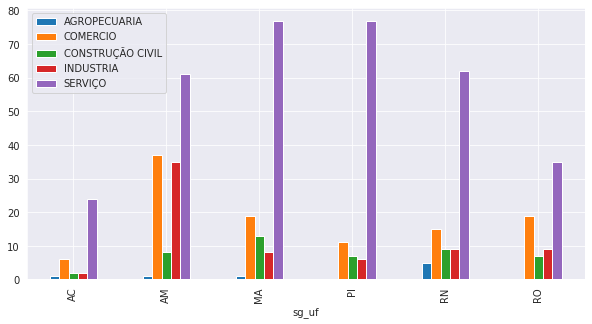

In [ ]:
portfolio_2.groupby('sg_uf')['setor'].apply(pd.Series.value_counts).unstack().plot.bar(figsize = (10,5))

In [ ]:
portfolio_2['de_faixa_faturamento_estimado'].value_counts()

DE R$ 10.000.000,01 A R$ 30.000.000,00      278
DE R$ 30.000.000,01 A R$ 100.000.000,00     202
DE R$ 100.000.000,01 A R$ 300.000.000,00     58
DE R$ 300.000.000,01 A R$ 500.000.000,00     15
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS      8
ACIMA DE 1 BILHAO DE REAIS                    5
Name: de_faixa_faturamento_estimado, dtype: int64

O portfólio 3 apresenta apenas empresas de prestação de serviços e com faturamento alto, principalmente acima de R$ 30 milhões. 

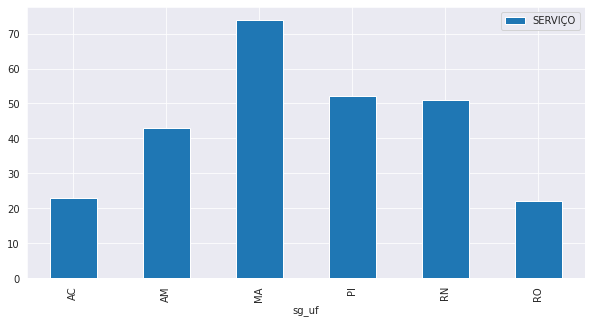

In [ ]:
portfolio_3.groupby('sg_uf')['setor'].apply(pd.Series.value_counts).unstack().plot.bar(figsize = (10,5))

In [ ]:
portfolio_3['de_faixa_faturamento_estimado'].value_counts()

DE R$ 30.000.000,01 A R$ 100.000.000,00     138
DE R$ 10.000.000,01 A R$ 30.000.000,00       61
DE R$ 100.000.000,01 A R$ 300.000.000,00     49
DE R$ 300.000.000,01 A R$ 500.000.000,00      9
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS      6
ACIMA DE 1 BILHAO DE REAIS                    2
Name: de_faixa_faturamento_estimado, dtype: int64

## Modelo KNN (Nearest Neighbors)

Esse modelo implementa um algoritmo não supervisionado que busca encontrar os vizinhos mais próximos com base nas semelhanças entre eles. Nesse caso, vamos procurar os 5 mais aderentes, pois é o total de setores únicos.

In [ ]:
base['setor'].nunique()

5

In [ ]:
qtd_neighbors = 5
model = NearestNeighbors(n_neighbors=qtd_neighbors, algorithm='brute' )

In [ ]:
model.fit(base_dummies)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

### Gerando sugestões (leads)


Farei o cálculo para cada portfólio. O modelo gera 5 sugestões. A primeira é o cliente do portfólio e as outras quatro são as sugestões mais aderentes a esse cliente.

In [ ]:
previsao_port_1 = model.kneighbors(portfolio_1_train, return_distance=False)

In [ ]:
previsao_port_2 = model.kneighbors(portfolio_2_train, return_distance=False)

In [ ]:
previsao_port_3 = model.kneighbors(portfolio_3_train, return_distance=False)

In [ ]:
previsao_port_1[:5]

array([[   367,   8539, 101117, 112455, 119458],
       [   600, 366301, 259223, 200633, 277284],
       [  1692,   1863, 207641, 285867, 185159],
       [  2510, 159879,  26280, 170734, 380802],
       [  5765, 366383,  12168, 413621, 399990]])

In [ ]:
leads_port_1 = base.iloc[previsao_port_1.reshape(-1)]

In [ ]:
leads_port_2 = base.iloc[previsao_port_2.reshape(-1)]

In [ ]:
leads_port_3 = base.iloc[previsao_port_3.reshape(-1)]

In [ ]:
print(leads_port_1.shape, leads_port_2.shape, leads_port_3.shape)

(2775, 32) (2830, 32) (1325, 32)


Nesse ponto temos as sugestões de clientes para todos os portfólios.  Se compararmos o id do primeiro cliente do portfolio 1 e o primeiro id das leads, veremos que é o mesmo. 

In [ ]:
(portfolio_1_train.head(1).index, leads_port_1.head(1).index)

(Int64Index([395201], dtype='int64', name='id'),
 Int64Index([395201], dtype='int64', name='id'))

In [ ]:
leads_port_1.reset_index(inplace=True)
leads_port_2.reset_index(inplace=True)
leads_port_3.reset_index(inplace=True)

In [ ]:
leads_port_1.head()

,id,fl_matriz,sg_uf,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,vl_faturamento_estimado_aux,qt_filiais,porte
0,395201,1,PI,COMERCIO,<= 1,0,0,0,1,0,0,0,0,0,COMERCIO VAREJISTA,0,0,0,0,0.0,0.0,0,CINZA,SEM INFORMACAO,BAIXA,0,SUDOESTE PIAUIENSE,SAO RAIMUNDO NONATO,0,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,0,Micro
1,235294,1,PI,COMERCIO,<= 1,0,0,0,1,0,0,0,1,0,COMERCIO VAREJISTA,0,0,0,0,0.0,0.0,0,CINZA,SEM INFORMACAO,BAIXA,0,SUDOESTE PIAUIENSE,SAO RAIMUNDO NONATO,0,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,0,Micro
2,47552,1,PI,COMERCIO,<= 1,0,0,0,1,0,0,0,1,0,COMERCIO VAREJISTA,0,0,0,0,0.0,0.0,0,CINZA,SEM INFORMACAO,BAIXA,0,SUDOESTE PIAUIENSE,SAO RAIMUNDO NONATO,0,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,0,Micro
3,150730,1,PI,COMERCIO,<= 1,0,0,0,1,0,0,0,1,0,COMERCIO VAREJISTA,0,0,0,0,0.0,0.0,0,CINZA,SEM INFORMACAO,BAIXA,0,SUDOESTE PIAUIENSE,SAO RAIMUNDO NONATO,0,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,0,Micro
4,321018,1,PI,COMERCIO,<= 1,0,0,0,1,0,0,0,1,0,COMERCIO VAREJISTA,0,0,0,0,0.0,0.0,0,CINZA,SEM INFORMACAO,BAIXA,0,SUDOESTE PIAUIENSE,SAO RAIMUNDO NONATO,0,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,0,Micro


### Visualização Mapa

A visualização em um mapa dos clientes e sugestões é uma ótima forma de verificar como o modelo está performando e como está gerando as leads. 

Para isso ser possível precisamos da latitude e longitude da micro região, isso está salvo em um dataset que encontrei no [GitHub](https://github.com/codenation-dev/squad-1-ad-data-science-1/blob/master/recommender_system_squad_1/coord_geograficas_microrregioes_brasil.csv). Nas próximas células, farei a leitura desse dataset e a criação das colunas de latitude e longitude nos Dataframes das leads.

In [ ]:
lat_long = pd.read_csv('lat_long_micro.csv')

In [ ]:
lat_long.head()

,Unnamed: 0,Unnamed: 0.1,nm_uf,nm_micro,lng,lat
0,0,0,SAO PAULO,ADAMANTINA,-50.997688,-21.706115
1,1,1,ESPÍRITO SANTO,AFONSO CLAUDIO,-41.018390,-20.191878
2,2,2,MARANHÃO,AGLOMERACAO URBANA DE SAO LUIS,-44.142982,-2.562962
3,3,3,SERGIPE,AGRESTE DE ITABAIANA,-37.411976,-10.729138
4,4,4,SERGIPE,AGRESTE DE LAGARTO,-37.680786,-10.921736


In [ ]:
#Adicionando Latitude e Longitude ao conjunto de dados previstos para visualização no mapa
leads_port_1['lat'] = leads_port_1['nm_micro_regiao'].apply(lambda micro: lat_long[lat_long['nm_micro'] == micro]['lat'].values[0])
leads_port_1['lng'] = leads_port_1['nm_micro_regiao'].apply(lambda micro: lat_long[lat_long['nm_micro'] == micro]['lng'].values[0])

In [ ]:
leads_port_2['lat'] = leads_port_2['nm_micro_regiao'].apply(lambda micro: lat_long[lat_long['nm_micro'] == micro]['lat'].values[0])
leads_port_2['lng'] = leads_port_2['nm_micro_regiao'].apply(lambda micro: lat_long[lat_long['nm_micro'] == micro]['lng'].values[0])

In [ ]:
leads_port_3['lat'] = leads_port_3['nm_micro_regiao'].apply(lambda micro: lat_long[lat_long['nm_micro'] == micro]['lat'].values[0])
leads_port_3['lng'] = leads_port_3['nm_micro_regiao'].apply(lambda micro: lat_long[lat_long['nm_micro'] == micro]['lng'].values[0])

O mapa é montando com auxílio da biblioteca Folium. Farei a inclusão de uma parte dos dados para não poluir demais a visualização. 

In [ ]:
def create_viz_map(data, qtd):
  mapa_fig = folium.Figure(width=1000, height=600,)
  
  mapa = folium.Map(location= [-16.1237611, -59.9219642],
                    zoom_start=4).add_to(mapa_fig)
  
  cliente_cod = " "
  for index, cliente in data.head(qtd).iterrows():
    #Verifica se é o cliente do portfolio, o primeiro da lista de leads
    if ((index % 5) == 0):
      cliente_cod = str(index)
      cor = 'orange'
    else:
      cor = 'blue'
    
    #Soma de um valor random nas coordenadas para os pontos não ficarem sobrepostos
    ponto = cliente[['lat', 'lng']] + [random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1)]
    setor = "Cliente " + cliente_cod + " :" + str(cliente['setor'])
    
    folium.Marker( location=ponto,
                  popup= setor,
                  icon=folium.Icon(color=cor)
        ).add_to(mapa)

  return mapa

Os pontos em laranja são os clientes atuais que estão no portfólio. Os pontos em azul são as sugestões que o modelo está gerando.

Ao clicar em qualquer um dos pontos será exibido o índice do cliente e o setor. As leads exibem o código do cliente ao qual foram baseadas.

In [ ]:
create_viz_map(leads_port_1, 50)

In [ ]:
cod_cli = 20
leads_port_1[cod_cli:cod_cli+5]

,id,fl_matriz,sg_uf,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,vl_faturamento_estimado_aux,qt_filiais,porte,lat,lng
20,446428,1,RN,COMERCIO,15 a 20,0,0,0,0,0,0,1,1,1,COMERCIO VAREJISTA,0,0,0,1,0.0,0.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,LESTE POTIGUAR,NATAL,0,"DE R$ 1.500.000,01 A R$ 4.800.000,00",3029140.8,3,Pequena,-5.692452,-35.266883
21,124302,1,RN,COMERCIO,10 a 15,0,0,0,0,0,0,1,1,1,COMERCIO VAREJISTA,0,0,1,0,0.0,1.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,LESTE POTIGUAR,NATAL,1,"DE R$ 1.500.000,01 A R$ 4.800.000,00",3029140.8,5,Pequena,-5.692452,-35.266883
22,93473,1,RO,COMERCIO,5 a 10,0,0,0,0,0,0,0,1,0,COMERCIO VAREJISTA,0,0,0,1,0.0,0.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,MADEIRA-GUAPORE,PORTO VELHO,0,"DE R$ 1.500.000,01 A R$ 4.800.000,00",3029140.8,3,Pequena,-8.761830,-63.902000
23,237558,1,MA,COMERCIO,10 a 15,0,0,0,0,0,0,0,1,1,COMERCIO VAREJISTA,0,0,0,1,0.0,1.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,0,"DE R$ 1.500.000,01 A R$ 4.800.000,00",3029140.8,2,Pequena,-2.562962,-44.142982
24,390257,1,AM,COMERCIO,1 a 5,0,0,0,0,0,0,0,1,1,COMERCIO VAREJISTA,0,0,0,1,0.0,0.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,CENTRO AMAZONENSE,MANAUS,1,"DE R$ 1.500.000,01 A R$ 4.800.000,00",3029140.8,2,Pequena,-3.407914,-59.866131


Visualizando o portfólio 2

In [ ]:
create_viz_map(leads_port_2, 50)

In [ ]:
cod_cli = 0
leads_port_2[cod_cli:cod_cli+5]

,id,fl_matriz,sg_uf,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,vl_faturamento_estimado_aux,qt_filiais,porte,lat,lng
0,17646,1,AC,SERVIÇO,10 a 15,0,0,0,0,0,0,1,1,0,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,0,0,1,0,0.0,4.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,VALE DO ACRE,RIO BRANCO,1,"DE R$ 300.000.000,01 A R$ 500.000.000,00",327487200.0,0,Grande,-9.997215,-67.584183
1,454113,1,AC,SERVIÇO,> 20,0,0,0,0,0,0,1,1,0,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,0,0,1,0,2.0,16.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,VALE DO ACRE,RIO BRANCO,1,"DE R$ 300.000.000,01 A R$ 500.000.000,00",327178100.0,0,Grande,-9.997215,-67.584183
2,174139,1,MA,SERVIÇO,> 20,0,0,0,0,0,0,0,0,1,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,0,0,1,0,12.0,6.0,0,AZUL,ACIMA DE 1 ANO,ALTA,0,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,1,"DE R$ 300.000.000,01 A R$ 500.000.000,00",324756860.0,3,Grande,-2.562962,-44.142982
3,331572,1,AM,SERVIÇO,10 a 15,0,0,0,0,0,0,1,1,1,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,0,0,1,0,2.0,126.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,CENTRO AMAZONENSE,MANAUS,1,"DE R$ 300.000.000,01 A R$ 500.000.000,00",323108350.0,0,Grande,-3.407914,-59.866131
4,457595,0,MA,SERVIÇO,1 a 5,0,0,0,0,0,0,1,1,1,ATIVIDADES DE ORGANIZACOES ASSOCIATIVAS,0,0,0,0,0.0,2.0,0,VERMELHO,ACIMA DE 1 ANO,ALTA,0,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,1,"DE R$ 300.000.000,01 A R$ 500.000.000,00",333669120.0,10,Grande,-2.562962,-44.142982


In [ ]:
cod_cli = 0
leads_port_2[cod_cli:cod_cli+5]

,id,fl_matriz,sg_uf,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,vl_faturamento_estimado_aux,qt_filiais,porte,lat,lng
0,17646,1,AC,SERVIÇO,10 a 15,0,0,0,0,0,0,1,1,0,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,0,0,1,0,0.0,4.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,VALE DO ACRE,RIO BRANCO,1,"DE R$ 300.000.000,01 A R$ 500.000.000,00",327487200.0,0,Grande,-9.997215,-67.584183
1,454113,1,AC,SERVIÇO,> 20,0,0,0,0,0,0,1,1,0,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,0,0,1,0,2.0,16.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,VALE DO ACRE,RIO BRANCO,1,"DE R$ 300.000.000,01 A R$ 500.000.000,00",327178100.0,0,Grande,-9.997215,-67.584183
2,174139,1,MA,SERVIÇO,> 20,0,0,0,0,0,0,0,0,1,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,0,0,1,0,12.0,6.0,0,AZUL,ACIMA DE 1 ANO,ALTA,0,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,1,"DE R$ 300.000.000,01 A R$ 500.000.000,00",324756860.0,3,Grande,-2.562962,-44.142982
3,331572,1,AM,SERVIÇO,10 a 15,0,0,0,0,0,0,1,1,1,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,0,0,1,0,2.0,126.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,CENTRO AMAZONENSE,MANAUS,1,"DE R$ 300.000.000,01 A R$ 500.000.000,00",323108350.0,0,Grande,-3.407914,-59.866131
4,457595,0,MA,SERVIÇO,1 a 5,0,0,0,0,0,0,1,1,1,ATIVIDADES DE ORGANIZACOES ASSOCIATIVAS,0,0,0,0,0.0,2.0,0,VERMELHO,ACIMA DE 1 ANO,ALTA,0,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,1,"DE R$ 300.000.000,01 A R$ 500.000.000,00",333669120.0,10,Grande,-2.562962,-44.142982


Mapa Portfólio 3

In [ ]:
create_viz_map(leads_port_3, 50)

In [ ]:
cod_cli = 30
leads_port_3[cod_cli:cod_cli+5]

,id,fl_matriz,sg_uf,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,vl_faturamento_estimado_aux,qt_filiais,porte,lat,lng
30,45557,1,MA,SERVIÇO,15 a 20,0,0,0,0,0,0,0,0,1,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,0,0,0,0,0.0,0.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,1,"DE R$ 100.000.000,01 A R$ 300.000.000,00",195554740.0,0,Grande,-2.562962,-44.142982
31,3802,1,PI,SERVIÇO,> 20,0,0,0,0,0,0,0,0,0,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,0,0,1,0,0.0,2.0,0,AZUL,ACIMA DE 1 ANO,MEDIA,0,SUDESTE PIAUIENSE,PICOS,1,"DE R$ 100.000.000,01 A R$ 300.000.000,00",196533540.0,0,Grande,-6.954526,-41.631929
32,212136,1,PI,COMERCIO,> 20,0,0,0,0,0,0,0,0,0,COMERCIO POR ATACADO EXCETO VEICULOS AUTOMOTOR...,1,1,1,0,172.0,53.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,SUDOESTE PIAUIENSE,FLORIANO,1,"DE R$ 100.000.000,01 A R$ 300.000.000,00",194524420.0,17,Grande,-7.358067,-43.093143
33,237020,1,MA,COMERCIO,> 20,0,0,0,0,0,0,1,1,0,COMERCIO POR ATACADO EXCETO VEICULOS AUTOMOTOR...,0,0,1,0,203.0,85.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,LESTE MARANHENSE,CODO,1,"DE R$ 100.000.000,01 A R$ 300.000.000,00",193391070.0,6,Grande,-4.447532,-44.133144
34,124970,0,MA,COMERCIO,1 a 5,0,1,0,0,0,0,1,1,1,COMERCIO VAREJISTA,0,0,0,0,1.0,0.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,1,"DE R$ 100.000.000,01 A R$ 300.000.000,00",192978940.0,116,Grande,-2.562962,-44.142982


In [ ]:
cod_cli = 40
leads_port_3[cod_cli:cod_cli+5]

,id,fl_matriz,sg_uf,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,vl_faturamento_estimado_aux,qt_filiais,porte,lat,lng
40,227882,1,AC,SERVIÇO,5 a 10,0,0,0,0,0,0,1,1,0,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,0,0,1,0,1.0,11.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,VALE DO ACRE,RIO BRANCO,1,"DE R$ 30.000.000,01 A R$ 100.000.000,00",35185428.0,0,Grande,-9.997215,-67.584183
41,81328,1,AM,SERVIÇO,5 a 10,0,0,0,0,0,0,1,1,1,SERVICOS PARA EDIFICIOS E ATIVIDADES PAISAGIST...,0,0,1,0,0.0,0.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,CENTRO AMAZONENSE,MANAUS,1,"DE R$ 30.000.000,01 A R$ 100.000.000,00",35133910.0,0,Grande,-3.407914,-59.866131
42,176504,1,AM,COMERCIO,1 a 5,0,0,0,0,0,0,0,0,1,COMERCIO POR ATACADO EXCETO VEICULOS AUTOMOTOR...,0,0,0,1,0.0,0.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,CENTRO AMAZONENSE,MANAUS,1,"DE R$ 30.000.000,01 A R$ 100.000.000,00",35133910.0,0,Grande,-3.407914,-59.866131
43,413889,0,AM,COMERCIO,> 20,0,0,0,0,0,0,1,1,1,COMERCIO POR ATACADO EXCETO VEICULOS AUTOMOTOR...,0,0,1,0,63.0,90.0,0,VERDE,ACIMA DE 1 ANO,ALTA,0,CENTRO AMAZONENSE,MANAUS,0,"DE R$ 30.000.000,01 A R$ 100.000.000,00",35133910.0,22,Grande,-3.407914,-59.866131
44,76446,1,PI,SERVIÇO,> 20,0,0,0,0,0,0,0,0,0,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,0,0,1,0,4.0,1.0,0,AZUL,ACIMA DE 1 ANO,ALTA,0,CENTRO NORTE PIAUIENSE,MEDIO PARNAIBA PIAUIENSE,1,"DE R$ 30.000.000,01 A R$ 100.000.000,00",35288460.0,0,Grande,-6.067810,-42.692828


# Conclusão

Portanto, o modelo está funcionando corretamente e gerando ótimas sugestões de novos clientes. 

Outras abordagens também podem ser eficientes, como se estivermos buscando clientes próximos e apenas com o mesmo ramo de atividade. Para isso, pode ser realizada uma próxima versão com o treinamento do modelo apenas com features relativas à localização e ao ramo de atividade. Tudo depende da necessidade do cliente e o valor que queremos gerar.